# Python 101 (Week 3)

In [183]:
#Importing necessary libraries
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import pandas as pd
import geopandas as gpd
import geoplot as gplt

# SciPy

SciPy is an open-source scientific computing library that has a built-on dependency with NumPy. This library has a plethora of tools to compute complex mathematical operations such as: Signal processing, Fourier Transforms, Linear Algebra, Complex Analysis, Statistics, etc.



For this section, we'll be importing a tidal data from NOAA at the station in Clearwater, Florida into a DataFrame.

In [6]:
#Import Data
tidal_data = pd.read_csv("CO-OPS_8726724_met.csv",sep=",",parse_dates=[['Date', 'Time (GMT)']])
#Removing Empty Column 
tidal_data.drop(columns="Preliminary (m)",inplace=True)
#Renaming Column for easier calllability 
tidal_data.columns = ["Date", "Predicted (m)", "Observed (m)"]
tidal_data

,Date,Predicted (m),Observed (m)
0,2023-12-04 00:00:00,0.471,0.710
1,2023-12-04 00:06:00,0.468,0.698
2,2023-12-04 00:12:00,0.466,0.710
3,2023-12-04 00:18:00,0.463,0.678
4,2023-12-04 00:24:00,0.461,0.682
...,...,...,...
475,2023-12-05 23:30:00,0.587,0.731
476,2023-12-05 23:36:00,0.586,0.704
477,2023-12-05 23:42:00,0.585,0.744
478,2023-12-05 23:48:00,0.583,0.721


<Axes: xlabel='Date', ylabel='Observed Water Level (ft)'>

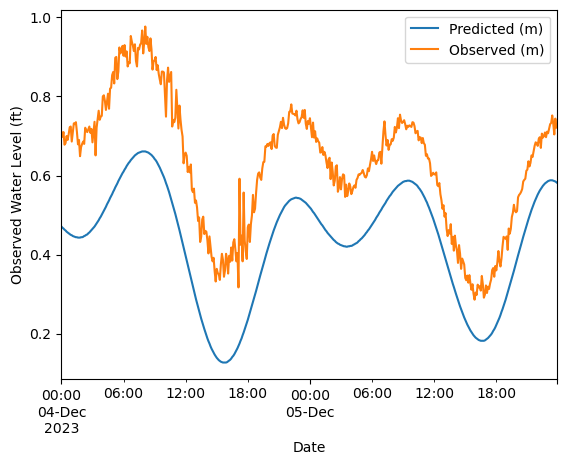

In [7]:
#Let's plot the data!
tidal_data.plot(x = "Date",y = ["Predicted (m)","Observed (m)"],ylabel='Observed Water Level (ft)', xlabel='Date')

In this water level data set from Clearwater, Florida, we can see the oscillatory behavior of the water level that coincides with the tides. We will use different functions from SciPy to analyze various properties of these tidal motions. First, we must convert this datetime into a proper time array and our water level data into numpy arrays. 

In [9]:
#Creating a new column of Time in Seconds
n_data = len(tidal_data["Date"])
tidal_data["Time (s)"] = np.linspace(0,6*60*(n_data-1),n_data) #
tidal_data

,Date,Predicted (m),Observed (m),Time (s)
0,2023-12-04 00:00:00,0.471,0.710,0.0
1,2023-12-04 00:06:00,0.468,0.698,360.0
2,2023-12-04 00:12:00,0.466,0.710,720.0
3,2023-12-04 00:18:00,0.463,0.678,1080.0
4,2023-12-04 00:24:00,0.461,0.682,1440.0
...,...,...,...,...
475,2023-12-05 23:30:00,0.587,0.731,171000.0
476,2023-12-05 23:36:00,0.586,0.704,171360.0
477,2023-12-05 23:42:00,0.585,0.744,171720.0
478,2023-12-05 23:48:00,0.583,0.721,172080.0


In [10]:
#Convert Time and Observations to Arrays 
t = tidal_data["Time (s)"].to_numpy()
wl_obs = tidal_data["Observed (m)"].to_numpy()
wl_pred = tidal_data["Predicted (m)"].to_numpy()

For this exercise, we will be focusing on only the first set of 24 hours of the data.

In [12]:
#Focusing on Changes over a Day
#Indexing the first 24 hours 
time_indx = t/3600<=24

#Creating new variables for prediction and observations for 24 hours of data 
t_dia = t[time_indx]/3600 #Converting seconds to hours
wl_dia = wl_obs[time_indx]
wl_pred_dia = wl_pred[time_indx]

## Find the Maximum and Minima in the Data

In the **signal** toolbox of SciPy, there are a few functions to find the element locations of the relative extrema within your data. Here are the syntax for the three functions: <br>

**sp.signal.argrelextrema(data,comparator_function)**: Returns an array of element positions in the data where the extrema of the given function is located <br>
**sp.signal.argrelmax(data)**: Returns an array of element positions in the data where the relative maximums are located <br>
**sp.signal.argrelmin(data)**: Returns an array of element position in the data where the relative minimums are located


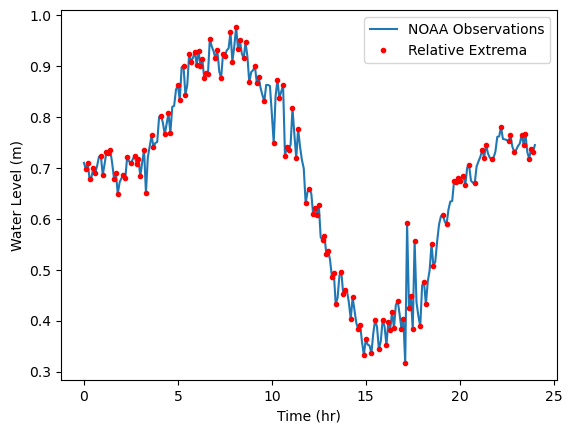

In [15]:
#Using the Relative Extrema Function
#Getting Relative Maxima
i_relextrema_min = sp.signal.argrelextrema(wl_dia,np.less)[0]
#Getting Relative Minima
i_relextrema_max = sp.signal.argrelextrema(wl_dia,np.greater)[0]
#Combining the Relative Maxima and Minima 
i_relextrema = np.append(i_relextrema_max,i_relextrema_min)
#Sorting in ascending order 
i_relextrema = np.sort(i_relextrema)

#Plotting the Data 
plt.plot(t_dia,wl_dia, label="NOAA Observations")
plt.plot(t_dia[i_relextrema],wl_dia[i_relextrema],'r.',label = "Relative Extrema")
plt.xlabel("Time (hr)")
plt.ylabel("Water Level (m)")
plt.legend()

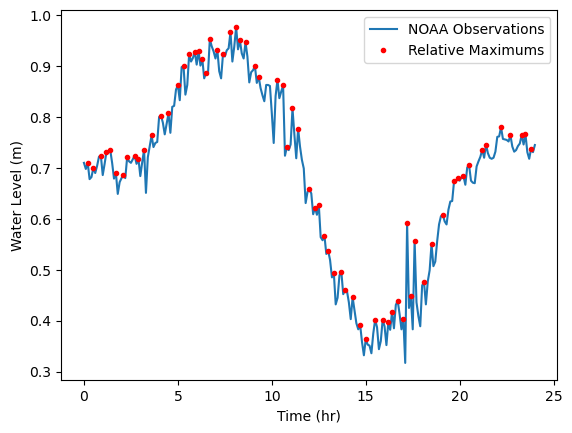

In [16]:
#Using the Relative Maximum Function 
i_relmax = sp.signal.argrelmax(wl_dia)[0]

#Plotting the Data 
plt.plot(t_dia,wl_dia, label="NOAA Observations")
plt.plot(t_dia[i_relmax],wl_dia[i_relmax],'r.',label = "Relative Maximums")
plt.xlabel("Time (hr)")
plt.ylabel("Water Level (m)")
plt.legend()

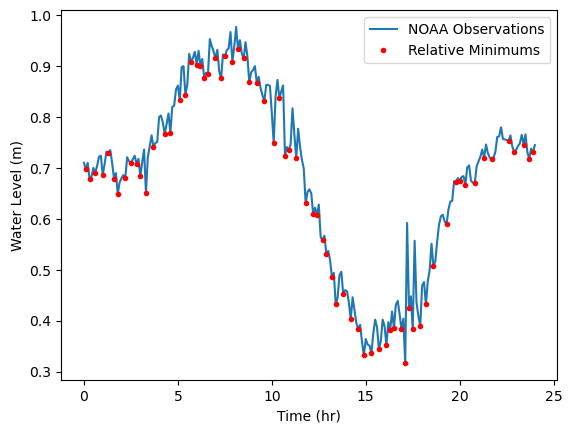

In [17]:
#Using the Relative Minimum Function
i_relmin = sp.signal.argrelmin(wl_dia)[0]

#Plotting the Data 
plt.plot(t_dia,wl_dia, label="NOAA Observations")
plt.plot(t_dia[i_relmin],wl_dia[i_relmin],'r.',label = "Relative Minimums")
plt.xlabel("Time (hr)")
plt.ylabel("Water Level (m)")
plt.legend()

## Fourier Transforms

A periodic function can be decomposed into a sum of sine and cosine functions. This series of sums is known as a **Fourier Series**.
![Fourier_Series](https://mathworld.wolfram.com/images/equations/FourierSeries/NumberedEquation1.svg)

With this preface in mind, a Fourier Transform decomposes a waveform into its component in the frequency domain. You can see, which frequencies have the strongest influence on the behavior of the waveform. 

![Fourier_transform_time_and_frequency_domains](https://upload.wikimedia.org/wikipedia/commons/5/50/Fourier_transform_time_and_frequency_domains.gif) <br> **[3Blue1Brown has a great video for visualizing Fourier Transforms. ](https://youtu.be/spUNpyF58BY)**

In this section, we will be performing the Fast-Fourier Transform (FFT) on the tidal data from Clearwater. In SciPy, there is an entire toolbox devoted to computing Fourier and Inverse Fourier Transforms.<br>
<br>
Syntax: **sp.fft.fft(array)**

Before we perform the FFT, we need to get the range of frequencies the fft will return the waveform into. To do this SciPy has a function for this:<br>
<br>
**sp.fft.fftfreq(window_length, sample_spacing)**<br>
<br>
Note: The sample spacing is the inverse of the sample rate. 

 In our data set, a new measurement is recorded every 6 minutes, so the sample rate in second is 1/(6x60). Our window length will be the number of elements in the resulting FFT of our tidal data.

In [25]:
#Calculating Sample Rate
samp_rate = 1/(6*60)
#Performing fft on tidal data 
F = np.fft.fft(wl_dia)
#Calculating our range of frequencies
freq = np.fft.fftfreq(len(F), d=1/samp_rate)

The Fourier transform will return an array of complex values. To amend this, we take the absolute value of the our frequency-domained data.

Text(0.5, 1.0, 'FFT of Clearwater, Florida Tidal Data')

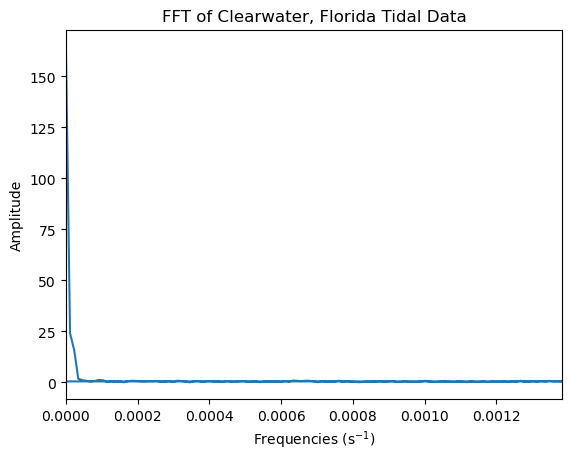

In [27]:
#Let's Plot our Fourier Transform
F = np.abs(F)
plt.plot(freq,F)
plt.xlim([0,max(freq)])
plt.xlabel(r"Frequencies (s$^{-1}$)")
plt.ylabel("Amplitude")
plt.title("FFT of Clearwater, Florida Tidal Data")

We subsample the amplitudes at positive frequencies since time is a positive variable. Using the extrema-related functions from the last section. We can determine the frequencies (and time-steps) that influence the waveform of our tidal data the most.

In [29]:
#Finding local maximums in Frequency Domain
sig_peak_loc = sp.signal.find_peaks(np.abs(F)[freq>0])[0]
peak_freq = 1/freq[sig_peak_loc[0]]
peak_freq = peak_freq/3600
(1/freq[sig_peak_loc])/3600 #Returning time steps in hours

array([3.44285714, 2.41      , 2.00833333, 1.60666667, 1.26842105,
       1.14761905, 1.00416667, 0.92692308, 0.77741935, 0.70882353,
       0.66944444, 0.63421053, 0.57380952, 0.53555556, 0.50208333,
       0.482     , 0.46346154, 0.4462963 , 0.42280702, 0.39508197,
       0.38253968, 0.37076923, 0.35970149, 0.32133333, 0.30897436,
       0.29753086, 0.28023256, 0.26777778, 0.25638298, 0.24845361,
       0.241     , 0.23627451, 0.22952381, 0.22523364, 0.22110092,
       0.21517857, 0.21140351, 0.20775862, 0.20423729])

In [30]:
#Corresponding Amplitudes to dominant frequencies 
np.abs(F[freq>0])[sig_peak_loc]

array([1.19127599, 0.53870053, 0.47960224, 0.75129785, 0.57731504,
       0.66858972, 0.59108964, 0.80983591, 0.65186397, 0.60286777,
       0.34308813, 0.64761141, 0.63174213, 0.37408854, 0.41763862,
       0.42583276, 0.60963213, 0.87957416, 0.79130519, 0.5492868 ,
       0.37281651, 0.7855304 , 0.54197183, 0.53027779, 0.60317257,
       0.5417401 , 0.75143408, 0.47134593, 0.44827788, 0.4228057 ,
       0.38850343, 0.32581732, 0.3769955 , 0.50247389, 0.76758483,
       0.57547848, 0.61965289, 0.75126613, 0.53344111])

This information is useful in determining the strongest tidal-patterns within a single day.

## Curve-Fitting 

SciPy has a curve-fitting within its **optimization** toolbox. This function is useful for testing fits on your data by returning the best coefficients and intercepts that fit the data. The function you input is the built-in function type in Python. It has the following syntax: <br>
<br>
**popt, pcov = sp.optimize.curve_fit(function,x-data,y-data,initial_param_guesses)** <br>

The function has two outputs: the first is the predicted optimal parameter values (**popt**), and the second is the estimated covarinace of the parameter estimate (**pcov**).

The tides are known as harmonic oscillators, meaning that it's behavior is periodic and can be analyze as that of a waveform. The base form of this behavior is sinusoidal:<br> ![tide_equation.gif](https://www.vims.edu/research/units/labgroups/tc_tutorial/_images/_tide_analysis/tide_equation.gif)

In [35]:
#Defining our tidal function 
def tide_func(time,R,T,n,c):
    return R*np.cos(T*(time+n)) +c

In [36]:
#Let's Fit our Data 
popt, pcov = sp.optimize.curve_fit(tide_func, t_dia,wl_dia,p0=[1,1/3.5,2,1])
popt

array([-0.24120979,  0.32453361,  3.09685125,  0.67573246])

In [37]:
#Let's create a new array of our fit-prediction water levels with our parameter values 
wl_fit = tide_func(t_dia,popt[0],popt[1],popt[2],popt[3])

Text(0.5, 1.0, 'Water Level Observations vs. Predicted')

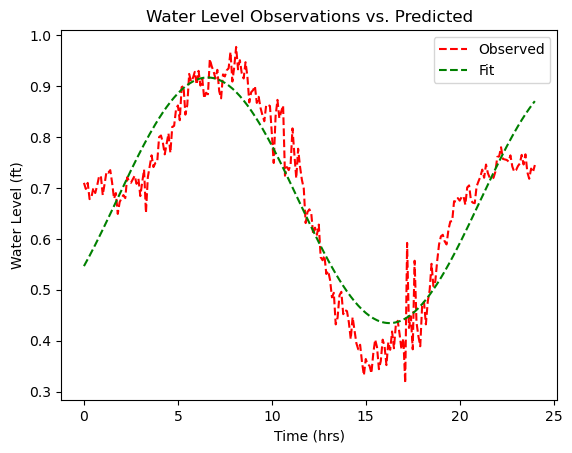

In [38]:
#Let's plot the observations vs the fit
plt.figure()
plt.plot(t_dia,wl_dia,"r--",label="Observed")
plt.plot(t_dia,wl_fit,"g--",label = "Fit")
plt.legend()
plt.xlabel("Time (hrs)")
plt.ylabel("Water Level (ft)")
plt.title("Water Level Observations vs. Predicted")

Text(0.5, 1.0, 'Water Level Observations vs. Predicted')

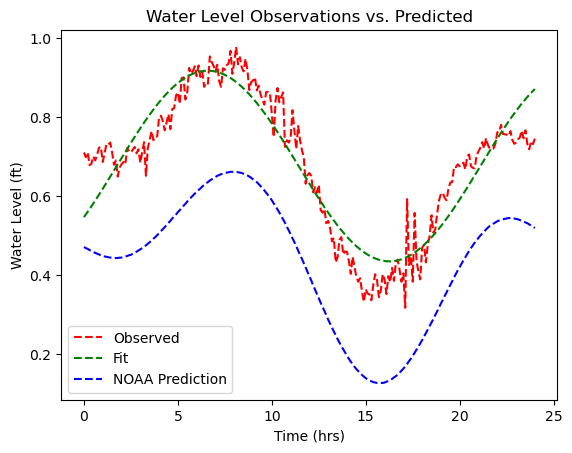

In [39]:
#Let's plot the observations vs the fit
plt.figure()
plt.plot(t_dia,wl_dia,"r--",label="Observed")
plt.plot(t_dia,wl_fit,"g--",label = "Fit")
plt.plot(t_dia,wl_pred_dia,"b--",label="NOAA Prediction")
plt.legend()
plt.xlabel("Time (hrs)")
plt.ylabel("Water Level (ft)")
plt.title("Water Level Observations vs. Predicted")

In [40]:
#Finding the period 
T = 1./popt[1]
print("The period is semidiurnal with a value of {} hours.".format(np.round(T,2)))

The period is semidiurnal with a value of 3.08 hours.


## Interpolation

### What's Interpolation?

Interpolation is the method for generating new points between two original points. This is handy in smoothing curves in data. The previous SciPy toolbox has depreciated its one-dimensional interpolation function. Thus NumPy's 1D interpolation function is the one we will use.  Let's try it with our tidal data.<br>
Interpolation Function:<br>
**np.interp(new array of x-values, OG array x-values, OG array y-values)** <br>
or <br>
**np.interp(new array of y-values, OG array y-values, OG array x-values)**

Text(0.02, 0.5, 'Water Level (m)')

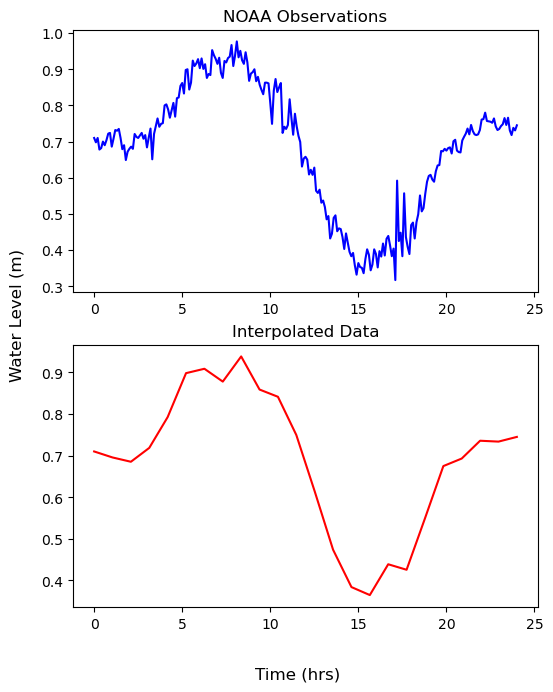

In [44]:
#Creating new array of of time 
#Our original array had 241 elements
t_dia_new = np.linspace(min(t_dia),max(t_dia),24)

#Interpolating with new time array 
wl_dia_new = np.interp(t_dia_new, t_dia, wl_dia)

#Plotting Original Data vs. Interpolated Data
fig,ax = plt.subplots(2,1)
fig.set_size_inches(6,7.5)
ax[0].plot(t_dia,wl_dia,'b',label="NOAA Observations")
ax[0].set_title("NOAA Observations")
ax[1].plot(t_dia_new,wl_dia_new,'r',label="Interpolated Observations")
ax[1].set_title("Interpolated Data")

fig.supxlabel("Time (hrs)")
fig.supylabel("Water Level (m)")

## Integration

The simplest definition of integration is the mathematical operation of finding the area under the curve of a function. This simplification doesn't quite capture the scope of applications of integrals/integration.<br>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Integral_example.svg/1920px-Integral_example.svg.png)

Before we look at the integration functions within SciPy, we'll look at Python Lambda. Python Lambda is a built-in feature that allows users to build anonymous functions:<br>
<br>
function_name = **lambda** arguments:expression <br>
<br>
Let's create some functions that we will use when performing the integrations.

In [83]:
my_fun1 = lambda x: x**2 +4

my_fun1(4)

20

In [85]:
my_fun2 = lambda x,y: 3*(x**2) +8*(y**2)

my_fun2(0.5,7)

392.75

In [87]:
my_fun3 = lambda x,y,z: z*(4*x**3 + 5*y**6)

my_fun3(9,1/8,9)

26244.000171661377

In [89]:
my_fun4 = lambda x1,x2,x3,x4,x5: x5**5 +4*x4**4 + 3*x3**3 +3*x2**2 + x1 +6
my_fun4(5,10,0.9, 1/100,1/3)

313.1911152663375

### Integration Functions

Single Integral: **sp.integrate.quad(func,a,b)** <br>
$$ \int_a^b f(x),dx$$ <br> 
<br>
Double Integral: **sp.integrate.dblquad(func,a,b,gfun,hfun)** <br>
$$ \int_a^b \int_{gfun}^{hfun} f(x,y) dydx $$<br> 
<br>
Triple Integral: **sp.integrate.tplquad(func,a,b,gfun,hfun,qfun,rfun)** <br>
$$ \int_a^b \int_{gfun}^{hfun} \int_{qfun}^{rfun} f(x,y,z) dz,dy,dz$$ <br>
<br>
Nth-Order Integrals: **sp.integrate.nquad(func, integrating_ranges)**<br>
$$ \int_{a_n}^{b_n} \dots \int_{a_2}^{b_2}\int_{a_1}^{b_1} f(x_1, x_2, \dots, x_n) dx_1 dx_2\dots dx_n$$


In [81]:
#Single Integral on my_func1
sp.integrate.quad(my_fun1, -1, 8)

(207.0, 2.298161660974074e-12)

The integral functions has two returns: the first is the result from the definite integral, and the second is the absolute error of the integral result.

In [93]:
#Double Integral on my_fun2
sp.integrate.dblquad(my_fun2, np.pi/9, np.pi/2, np.cos, 9) #You can put functions as the follow integral limits

(978.6716772913753, 1.0865438296774059e-11)

In [111]:
#Triple Integral on my_func3
sp.integrate.tplquad(my_fun3, 1/8, 1/4, 0, lambda x: 2*x+3, 0, lambda x,y: np.exp(y))

(6503.193974294782, 5.206460611245585e-06)

In [118]:
#Nth Order Integrals
sp.integrate.nquad(my_fun4, [[-1/8, 1/8], [7, 45], [0, 0.01], [-np.pi, np.pi], [-np.e,np.e]])

(8024.893833973026, 3.083060109017805e-10)

## SciPy Constants

The [list of constants](https://docs.scipy.org/doc/scipy/reference/constants.html) in the SciPy library exceedes what we saw in NumPy. To call a constant from the list use the following syntax: <br>
<br>
**sp.constants.constant**

In [ ]:
#This is a constant in particle physics and quantum mechanics 
sp.constants.hbar

In [ ]:
#SI Unit Prefixes 
sp.constants.pico

In [ ]:
#Unit conversion
sp.constants.inch #1 inch in meters

# Geopandas

Geospatial data describes objects, events or other features with a location on or near the earth's surface. As Earth scientists, we work with a lot of geospatial data. Similar to the pandas library we learned about last week. This week we'll be exploring the Geopandas library. This library is built up from the Pandas library (meaning Pandas is a dependency of Geopandas).

## GeoSeries

Similar to the Series datatype that we saw in the Pandas library, GeoPandas has its own version of this known as the Geo Series. It is also a one-dimensional data set comprised of shapely objects. 

![dataframe](https://geopandas.org/en/stable/_images/dataframe.svg)

**[Shapely](https://shapely.readthedocs.io/en/stable/geometry.html)** is a Python library that provides new data types for creating geometrical objects that assist in performing analysis over geographical areas. There are three types of shapely geometries: **Points**, **Lines**, and **Polygons**. <br>
**Points** represent of single coordinates in space. <br>
**Line**(Strings or Rings) are a collection of connected **Points**. (For LineRings, the line segments form a closed loop.) <br>
**Polygons** are a collection of **LineStrings**/**LineRings**.

## GeoDataFrame

A GeoDataFrame is nearly identical to the Pandas DataFrame we have seen before with an additional permanent column known as the **Geometry** column, a GeoSeries of *Shapely* objects.<br>
<br>
**gpd.GeoDataFrame(data, geometry)**

The input data can be from a dictionary or a pandas DataFrame. In this example, we will import data from an ICESat-2 track on Ross Ice Shelf into a pandas DataFrame.

In [136]:
df = pd.read_csv("ATL06_20231202212220_11432111_006_02_gt1l.csv")
df

,Latitude,Longitude,h_li
0,-79.029427,179.438772,3.402823e+38
1,-79.031002,179.437183,3.402823e+38
2,-79.067021,179.399811,3.402823e+38
3,-79.068952,179.398098,-1.440686e+02
4,-79.072798,179.394067,-1.087456e+02
...,...,...,...
104863,-79.006777,18.341225,3.177933e+03
104864,-79.006602,18.341047,3.177962e+03
104865,-79.006428,18.340869,3.177987e+03
104866,-79.006253,18.340692,3.178038e+03


First, we will subsample the data set to eliminate the truncated data points that are greater than $10^{38}$ and save the subsampled data into a new DataFrame.

In [144]:
sub_samp = df[df.h_li<10**38].to_numpy()
sub_samp

array([[ -79.06895227,  179.39809826, -144.06862   ],
       [ -79.07279767,  179.39406672, -108.74557   ],
       [ -79.07821756,  179.38842028, -122.72247   ],
       ...,
       [ -79.0064275 ,   18.34086924, 3177.987     ],
       [ -79.00625254,   18.34069172, 3178.0376    ],
       [ -79.00607755,   18.34051457, 3178.0283    ]])

In [146]:
df_new = pd.DataFrame(sub_samp,columns=["Latitude","Longitude","h_li"])
df_new

,Latitude,Longitude,h_li
0,-79.068952,179.398098,-144.06862
1,-79.072798,179.394067,-108.74557
2,-79.078218,179.388420,-122.72247
3,-79.087304,179.378807,129.00919
4,-79.103035,179.362288,-72.34628
...,...,...,...
98265,-79.006777,18.341225,3177.93290
98266,-79.006602,18.341047,3177.96200
98267,-79.006428,18.340869,3177.98700
98268,-79.006253,18.340692,3178.03760


Before creating our GeoDataFrame we need to convert our Latitude and Longitude values into a **shapely** object. GeoPandas has a function to convert two sets ordered data types into a GeoSeries of **Points**:<br>
<br>
**gpd.points_from_xy(x=longitude,y=latitude,crs)**<br>
<br>
The *"crs"* input is refering to the *"Coordinate Reference System* of the inputs, which for [ICESat-2 Data](https://nsidc.org/data/atl06/versions/6) is **EPSG:4326** (WGS:84).

In [156]:
geom = gpd.points_from_xy(df_new.Longitude,df_new.Latitude,crs="EPSG:4326")
geom

<GeometryArray>
[<POINT (179.398 -79.069)>, <POINT (179.394 -79.073)>,
 <POINT (179.388 -79.078)>, <POINT (179.379 -79.087)>,
 <POINT (179.362 -79.103)>,  <POINT (179.36 -79.105)>,
  <POINT (179.334 -79.13)>, <POINT (179.332 -79.132)>,
 <POINT (179.317 -79.146)>, <POINT (179.317 -79.146)>,
 ...
  <POINT (18.342 -79.008)>,  <POINT (18.342 -79.007)>,
  <POINT (18.342 -79.007)>,  <POINT (18.342 -79.007)>,
  <POINT (18.341 -79.007)>,  <POINT (18.341 -79.007)>,
  <POINT (18.341 -79.007)>,  <POINT (18.341 -79.006)>,
  <POINT (18.341 -79.006)>,  <POINT (18.341 -79.006)>]
Length: 98270, dtype: geometry

Now, we're ready to build our first GeoDataFrame. 

In [209]:
gdf = gpd.GeoDataFrame(df_new.h_li,geometry=geom)
gdf

,h_li,geometry
0,-144.06862,POINT (179.39810 -79.06895)
1,-108.74557,POINT (179.39407 -79.07280)
2,-122.72247,POINT (179.38842 -79.07822)
3,129.00919,POINT (179.37881 -79.08730)
4,-72.34628,POINT (179.36229 -79.10304)
...,...,...
98265,3177.93290,POINT (18.34123 -79.00678)
98266,3177.96200,POINT (18.34105 -79.00660)
98267,3177.98700,POINT (18.34087 -79.00643)
98268,3178.03760,POINT (18.34069 -79.00625)


GeoDataFrames have the same base functionality as that of a pandas DataFrame (as it is the base of a GeoDataFrame).

In [164]:
#Calling the columns and rows
gdf.columns, gdf.index

(Index(['Latitude', 'Longitude', 'h_li', 'geometry'], dtype='object'),
 RangeIndex(start=0, stop=98270, step=1))

In [166]:
#Developing a Function to Calculate the Distance between two (lat, lon) coordinates in degrees
def coord_dist(lat1,lon1,lat2,lon2):
    #Converting coords from degrees to radians 
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)
    r_E = 6371*1000 #Earth's Radius in Meters
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    dist = c*r_E
    return (dist)

In [170]:
#Calculating the horizontal distance along the track
horiz_dist = coord_dist(float(gdf.Latitude[0]),float(gdf.Longitude[0]),gdf.Latitude.to_numpy(),gdf.Longitude.to_numpy())
horiz_dist

array([0.00000000e+00, 4.35954524e+02, 1.05025214e+03, ...,
       2.40427005e+06, 2.40428987e+06, 2.40430968e+06])

In [172]:
#Adding a new column of horizontal distance along track 
gdf["Horizontal Distance (m)"] = horiz_dist
gdf

,Latitude,Longitude,h_li,geometry,Horizontal Distance (m)
0,-79.068952,179.398098,-144.06862,POINT (179.39810 -79.06895),0.000000e+00
1,-79.072798,179.394067,-108.74557,POINT (179.39407 -79.07280),4.359545e+02
2,-79.078218,179.388420,-122.72247,POINT (179.38842 -79.07822),1.050252e+03
3,-79.087304,179.378807,129.00919,POINT (179.37881 -79.08730),2.080692e+03
4,-79.103035,179.362288,-72.34628,POINT (179.36229 -79.10304),3.864135e+03
...,...,...,...,...,...
98265,-79.006777,18.341225,3177.93290,POINT (18.34123 -79.00678),2.404230e+06
98266,-79.006602,18.341047,3177.96200,POINT (18.34105 -79.00660),2.404250e+06
98267,-79.006428,18.340869,3177.98700,POINT (18.34087 -79.00643),2.404270e+06
98268,-79.006253,18.340692,3178.03760,POINT (18.34069 -79.00625),2.404290e+06


In [174]:
#Rearranging the Columns in my GDF
gdf = gdf.iloc[:,[0,1,4,2,3]]
gdf

,Latitude,Longitude,Horizontal Distance (m),h_li,geometry
0,-79.068952,179.398098,0.000000e+00,-144.06862,POINT (179.39810 -79.06895)
1,-79.072798,179.394067,4.359545e+02,-108.74557,POINT (179.39407 -79.07280)
2,-79.078218,179.388420,1.050252e+03,-122.72247,POINT (179.38842 -79.07822)
3,-79.087304,179.378807,2.080692e+03,129.00919,POINT (179.37881 -79.08730)
4,-79.103035,179.362288,3.864135e+03,-72.34628,POINT (179.36229 -79.10304)
...,...,...,...,...,...
98265,-79.006777,18.341225,2.404230e+06,3177.93290,POINT (18.34123 -79.00678)
98266,-79.006602,18.341047,2.404250e+06,3177.96200,POINT (18.34105 -79.00660)
98267,-79.006428,18.340869,2.404270e+06,3177.98700,POINT (18.34087 -79.00643)
98268,-79.006253,18.340692,2.404290e+06,3178.03760,POINT (18.34069 -79.00625)


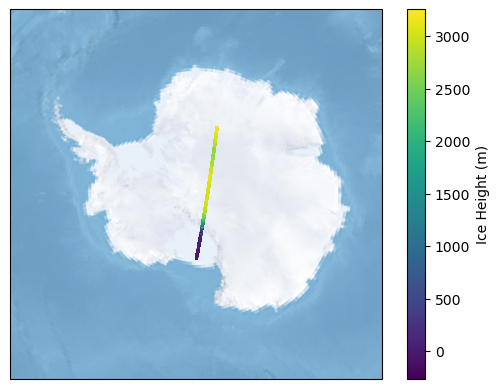

In [297]:
from cartopy import crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.stock_img()
# ax.coastlines()
sc = ax.scatter(df_new.Longitude.to_numpy(),df_new.Latitude.to_numpy(),s=1,c=df_new.h_li.to_numpy(),transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc)
cbar.set_label("Ice Height (m)")